Computational Literature Review

Creator: Jaren Haber, PhD, Nancy Xu

Date created: November 13, 2020

Date last modified: April 11, 2022

This notebook visualize the ratio and cosine trend over the years with corrected year data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.gcf() # For saving better figures
import numpy as np
import scipy

In [3]:
import os
os.getcwd()

'/home/jovyan/work/nancyxu'

In [8]:
df_path = '/home/jovyan/work/dictionary_methods/counts_and_subject.csv'

In [10]:
df = pd.read_csv(df_path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,0,Sociology,1978,Contemporary Sociology,j100496
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,0,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,0,Sociology,1983,American Sociological Review,j100080
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,0,Management & Organizational Behavior,1985,Management Science,j100269
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,0,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481
5,journal-article-10.2307_2579666,9,2,59,26,10,1,5313,0,0,0,Sociology,1990,Social Forces,j100364
6,journal-article-10.2307_2137036,10,1,16,8,13,7,5891,0,0,0,Sociology,1977,Journal of Health and Social Behavior,j100223
7,journal-article-10.2307_27747507,119,36,101,24,32,10,5858,0,0,0,Management & Organizational Behavior,2009,Academy of Management Perspectives,j101421
8,journal-article-10.2307_41274741,2,2,4,3,2,2,1201,0,0,0,Sociology,2000,Polish Sociological Review,j50003148
9,journal-article-10.2307_24708246,86,6,89,25,10,7,8888,0,0,0,Sociology,2013,Acta Sociologica,j101300


In [12]:
df['edited_filename'] = df['article_id'].apply(lambda x: x[16:])
df.head()

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,journal_title,journal_id,edited_filename
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,0,Sociology,1978,Contemporary Sociology,j100496,10.2307_2065002
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,0,Management & Organizational Behavior,1986,Public Productivity & Management Review,j100852,10.2307_3380821
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,0,Sociology,1983,American Sociological Review,j100080,10.2307_2095822
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,0,Management & Organizational Behavior,1985,Management Science,j100269,10.2307_2631839
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,0,Management & Organizational Behavior,2005,MIR: Management International Review,j50000481,10.2307_40836133


In [13]:
df = pd.merge(df, df_scores, how='left', on='edited_filename')
df.head()

,article_id,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,...,journal_title,journal_id,edited_filename,Unnamed: 0,Unnamed: 0.1,filename,text,relational_word2vec_cosine,demographic_word2vec_cosine,culture_word2vec_cosine
0,journal-article-10.2307_2065002,9,3,11,5,10,7,3529,0,0,...,Contemporary Sociology,j100496,10.2307_2065002,48041.0,48041.0,../../../jstor_data/ocr/journal-article-10.230...,symposium toward more cumulative inquiry phili...,0.483893,0.463146,0.613386
1,journal-article-10.2307_3380821,10,6,27,7,7,5,5195,0,0,...,Public Productivity & Management Review,j100852,10.2307_3380821,57494.0,57494.0,../../../jstor_data/ocr/journal-article-10.230...,productivity review analysis incentive sick le...,0.500650,0.470630,0.517173
2,journal-article-10.2307_2095822,57,6,61,24,26,61,7100,0,0,...,American Sociological Review,j100080,10.2307_2095822,14692.0,14692.0,../../../jstor_data/ocr/journal-article-10.230...,local friendship ties community attachment mas...,0.564931,0.531212,0.586242
3,journal-article-10.2307_2631839,2,0,4,0,0,0,315,0,0,...,Management Science,j100269,10.2307_2631839,67738.0,67738.0,../../../jstor_data/ocr/journal-article-10.230...,management science vol december printed notes ...,0.544285,0.526946,0.478299
4,journal-article-10.2307_40836133,74,52,91,28,30,7,7110,0,0,...,MIR: Management International Review,j50000481,10.2307_40836133,39044.0,39044.0,../../../jstor_data/ocr/journal-article-10.230...,mir special issue pp mir management internatio...,0.737297,0.562613,0.592721


In [14]:
df['culture_ratio'] = df['culture_ngram_count']/df['word_count']
df['demographic_ratio'] = df['demographic_ngram_count']/df['word_count']
df['relational_ratio'] = df['relational_ngram_count']/df['word_count']

df['culture_word2vec'] = df['culture_word2vec_cosine'] #/df['word_count']
df['demographic_word2vec'] = df['demographic_word2vec_cosine'] #/df['word_count']
df['relational_word2vec'] = df['relational_word2vec_cosine'] #/df['word_count']

In [15]:
df['culture_ratio'] = (df['culture_ratio'] - df['culture_ratio'].min())/(df['culture_ratio'].max() - df['culture_ratio'].min())
df['demographic_ratio'] = (df['demographic_ratio'] - df['demographic_ratio'].min())/(df['demographic_ratio'].max() - df['demographic_ratio'].min())
df['relational_ratio'] = (df['relational_ratio'] - df['relational_ratio'].min())/(df['relational_ratio'].max() - df['relational_ratio'].min())


In [19]:
df.columns

Index(['article_id', 'culture_ngram_count', 'culture_ngram_count.1',
       'relational_ngram_count', 'relational_ngram_count.1',
       'demographic_ngram_count', 'demographic_ngram_count.1', 'word_count',
       'cultural_author_count', 'demographic_author_count',
       'relational_author_count', 'primary_subject', 'year', 'journal_title',
       'journal_id', 'edited_filename', 'Unnamed: 0', 'Unnamed: 0.1',
       'filename', 'text', 'relational_word2vec_cosine',
       'demographic_word2vec_cosine', 'culture_word2vec_cosine',
       'culture_ratio', 'demographic_ratio', 'relational_ratio',
       'culture_word2vec', 'demographic_word2vec', 'relational_word2vec'],
      dtype='object')

In [20]:
df.edited_filename

0                 10.2307_2065002
1                 10.2307_3380821
2                 10.2307_2095822
3                 10.2307_2631839
4                10.2307_40836133
5                 10.2307_2579666
6                 10.2307_2137036
7                10.2307_27747507
8                10.2307_41274741
9                10.2307_24708246
10       10.2307_humjsocrel.34.33
11               10.2307_41678755
12               10.2307_41300824
13               10.2307_40608228
14               10.2307_27522841
15               10.2307_41064839
16                10.2307_3653847
17               10.2307_40970475
18               10.2307_24048141
19                10.2307_2579310
20               10.2307_27522643
21               10.2307_42856964
22                10.2307_3088141
23                 10.2307_583974
24                10.2307_2137237
25                 10.2307_822641
26                 10.2307_583727
27                10.2307_3517123
28                10.2307_3516813
29            

In [21]:
pub_year_meta = pd.read_csv('publication_year_metadata.csv')

In [22]:
pub_year_meta

,Unnamed: 0,id,edited_filename,title,isPartOf,publicationYear,doi,docType,provider,datePublished,...,url,creator,publisher,language,pageStart,pageEnd,placeOfPublication,wordCount,pageCount,file
0,0,www.jstor.org/stable/351312,10.2307_351312,Sex-Role Congruency and Marital Quality,Journal of Marriage and Family,1983,NaN,article,jstor,1983-02-01,...,http://www.jstor.org/stable/351312,Gary Lee Bowen; Dennis K. Orthner,Wiley,eng,223,230,NaN,5495,8,part-2.jsonl.gz
1,1,www.jstor.org/stable/1171381,10.2307_1171381,"Bosses, Machines, and Democratic Leadership: P...",Social Science History,1988,NaN,article,jstor,1988-12-01,...,http://www.jstor.org/stable/1171381,Philip R. Vandermeer,Cambridge University Press,eng,395,428,NaN,12315,34,part-1.jsonl.gz
2,2,www.jstor.org/stable/20832283,10.2307_20832283,"RECOGNIZING GENDER BIAS, REJECTING FEMINISM: A...",Sociological Focus,2006,NaN,article,jstor,2006-02-01,...,http://www.jstor.org/stable/20832283,SUSAN R. CODY,"Taylor & Francis, Ltd.",eng,37,53,NaN,9241,17,part-1.jsonl.gz
3,3,www.jstor.org/stable/2096207,10.2307_2096207,Survival Chances of Newly Founded Business Org...,American Sociological Review,1992,NaN,article,jstor,1992-04-01,...,http://www.jstor.org/stable/2096207,Josef Brüderl; Peter Preisendörfer; Rolf Ziegler,American Sociological Association,eng,227,242,NaN,10467,16,part-1.jsonl.gz
4,4,www.jstor.org/stable/2391724,10.2307_2391724,Dimensions of Organizational Influence and The...,Administrative Science Quarterly,1976,NaN,article,jstor,1976-12-01,...,http://www.jstor.org/stable/2391724,Johannes M. Pennings,"Sage Publications, Inc.",eng,688,699,NaN,6022,12,part-1.jsonl.gz
5,5,www.jstor.org/stable/2629604,10.2307_2629604,"A Note on ""A Simple CPM Time-Cost Tradeoff Alg...",Management Science,1975,NaN,article,jstor,1975-02-01,...,http://www.jstor.org/stable/2629604,S. K. Goyal,INFORMS,eng,718,722,NaN,1784,5,part-1.jsonl.gz
6,6,www.jstor.org/stable/24047984,10.2307_24047984,"'Brothers 30,000, sisters 20,000; nephews 15,0...",Ethnography,2010,NaN,article,jstor,2010-09-01,...,http://www.jstor.org/stable/24047984,Stefano Boni,"Sage Publications, Ltd.",eng,381,408,NaN,13225,28,part-1.jsonl.gz
7,7,www.jstor.org/stable/greemanainte.47.5,10.2307_greemanainte.47.5,Introduction,Greener Management International,2004,NaN,article,jstor,2004-09-01,...,http://www.jstor.org/stable/greemanainte.47.5,Paul Nieuwenhuis; Peter Wells; Philip J. Vergragt,Greenleaf Publishing,eng,5,11,NaN,4073,7,part-3.jsonl.gz
8,8,www.jstor.org/stable/43294941,10.2307_43294941,ORGANIZATIONAL INNOVATION IN THE JAPANESE BASI...,Hitotsubashi Journal of Commerce and Management,1993,NaN,article,jstor,1993-12-01,...,http://www.jstor.org/stable/43294941,Takeru Kusunoki,Hitotsubashi University,eng,37,59,NaN,11384,23,part-3.jsonl.gz
9,9,www.jstor.org/stable/2695848,10.2307_2695848,Still Stable after All These Years? Personalit...,Social Psychology Quarterly,2000,NaN,article,jstor,2000-12-01,...,http://www.jstor.org/stable/2695848,Monika Ardelt,"Sage Publications, Inc.",eng,392,405,NaN,8564,14,part-2.jsonl.gz


In [26]:
m = df.merge(pub_year_meta, on = 'edited_filename')

In [29]:
m.columns

Index(['article_id', 'culture_ngram_count', 'culture_ngram_count.1',
       'relational_ngram_count', 'relational_ngram_count.1',
       'demographic_ngram_count', 'demographic_ngram_count.1', 'word_count',
       'cultural_author_count', 'demographic_author_count',
       'relational_author_count', 'primary_subject', 'year', 'journal_title',
       'journal_id', 'edited_filename', 'Unnamed: 0_x', 'Unnamed: 0.1',
       'filename', 'text', 'relational_word2vec_cosine',
       'demographic_word2vec_cosine', 'culture_word2vec_cosine',
       'culture_ratio', 'demographic_ratio', 'relational_ratio',
       'culture_word2vec', 'demographic_word2vec', 'relational_word2vec',
       'Unnamed: 0_y', 'id', 'title', 'isPartOf', 'publicationYear', 'doi',
       'docType', 'provider', 'datePublished', 'issueNumber', 'volumeNumber',
       'url', 'creator', 'publisher', 'language', 'pageStart', 'pageEnd',
       'placeOfPublication', 'wordCount', 'pageCount', 'file'],
      dtype='object')

In [30]:
df_avg = m.groupby(by=['publicationYear']).mean()

In [31]:
df_avg = df_avg.reset_index()

In [35]:
df_avg = df_avg[~(df_avg['publicationYear'].isin([1970,2016]))]

In [36]:
df_avg

,publicationYear,culture_ngram_count,culture_ngram_count.1,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,...,demographic_ratio,relational_ratio,culture_word2vec,demographic_word2vec,relational_word2vec,Unnamed: 0_y,doi,placeOfPublication,wordCount,pageCount
1,1971,14.001942,11.069903,30.516505,15.469903,12.025243,7.885437,4246.267961,0.000000,0.000000,...,0.038227,0.068894,0.577529,0.471770,0.496498,30696.176699,NaN,NaN,6098.069903,14.392233
2,1972,14.557769,11.000000,34.111554,16.894422,13.593625,7.649402,4395.005976,0.000000,0.000000,...,0.041032,0.076808,0.588906,0.469610,0.501367,32446.623506,NaN,NaN,6400.830677,14.960159
3,1973,15.286585,9.881098,36.492378,18.621951,12.942073,7.696646,4316.934451,0.000000,0.000000,...,0.039603,0.080329,0.574095,0.471380,0.498439,31555.044207,NaN,NaN,6214.192073,14.493902
4,1974,15.387292,9.847201,36.473525,18.007564,14.089259,9.186082,4747.170953,0.000000,0.000000,...,0.039977,0.078905,0.573670,0.470664,0.497127,31622.403933,NaN,NaN,6808.422088,15.478064
5,1975,15.126531,9.742857,35.768707,17.106122,15.216327,9.400000,4580.429932,0.000000,0.000000,...,0.042977,0.076622,0.572832,0.472211,0.497677,30848.395918,NaN,NaN,6502.054422,14.646259
6,1976,15.563953,9.375581,35.858140,18.394186,15.551163,9.843023,4571.230233,0.000000,0.006977,...,0.041260,0.077762,0.573824,0.473588,0.500521,31148.308140,NaN,NaN,6508.532558,14.418605
7,1977,15.928164,9.298746,35.771950,17.917902,13.167617,8.194983,4547.167617,0.000000,0.004561,...,0.038674,0.078159,0.569198,0.475315,0.504559,32643.160775,NaN,NaN,6434.555302,14.149373
8,1978,16.918322,10.059603,39.378587,18.932671,14.875276,9.018764,4829.338852,0.004415,0.006623,...,0.040444,0.079758,0.571914,0.474994,0.501445,30831.960265,NaN,NaN,6838.395143,15.312362
9,1979,17.257862,9.394130,38.376310,18.794549,14.946541,9.078616,4726.763103,0.007338,0.008386,...,0.039124,0.079680,0.575389,0.476183,0.505564,32301.801887,NaN,NaN,6702.335430,14.730608
10,1980,18.235244,9.526946,43.186484,20.680068,17.810094,10.712575,4975.769889,0.006843,0.006843,...,0.045003,0.082648,0.573390,0.479253,0.511764,31733.037639,NaN,NaN,7017.474765,15.607357


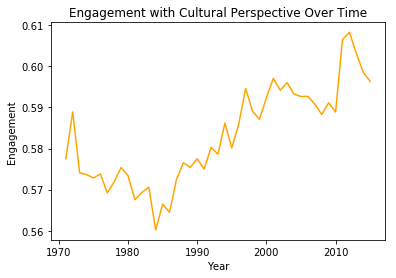

In [44]:
ax = sns.lineplot(x="publicationYear", y="culture_word2vec_cosine", data=df_avg, color = 'orange')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Cultural Perspective Over Time')
plt.show()

In [40]:
df_avg.columns

Index(['publicationYear', 'culture_ngram_count', 'culture_ngram_count.1',
       'relational_ngram_count', 'relational_ngram_count.1',
       'demographic_ngram_count', 'demographic_ngram_count.1', 'word_count',
       'cultural_author_count', 'demographic_author_count',
       'relational_author_count', 'Unnamed: 0_x', 'Unnamed: 0.1',
       'relational_word2vec_cosine', 'demographic_word2vec_cosine',
       'culture_word2vec_cosine', 'culture_ratio', 'demographic_ratio',
       'relational_ratio', 'culture_word2vec', 'demographic_word2vec',
       'relational_word2vec', 'Unnamed: 0_y', 'doi', 'placeOfPublication',
       'wordCount', 'pageCount'],
      dtype='object')

In [41]:
df_avg[['demographic_word2vec_cosine']]

,demographic_word2vec_cosine
1,0.471770
2,0.469610
3,0.471380
4,0.470664
5,0.472211
6,0.473588
7,0.475315
8,0.474994
9,0.476183
10,0.479253


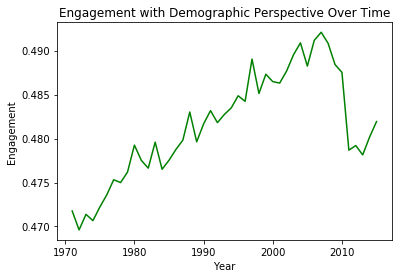

In [45]:
ax = sns.lineplot(x="publicationYear", y="demographic_word2vec_cosine", data=df_avg, color = 'green')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Demographic Perspective Over Time')
plt.show()

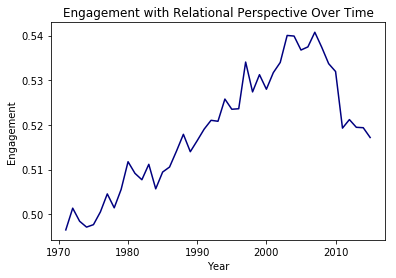

In [47]:
ax = sns.lineplot(x="publicationYear", y="relational_word2vec_cosine", data=df_avg, color = 'navy')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Engagement with Relational Perspective Over Time')
plt.show()

In [52]:
df_avg_sociology = m[m['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'publicationYear']].groupby(by=['publicationYear']).quantile(0.5)
df_avg_sociology = df_avg_sociology.reset_index()

In [53]:
df_avg_management = m[m['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'publicationYear']].groupby(by=['publicationYear']).quantile(0.5)
df_avg_management = df_avg_management.reset_index()

In [54]:
df_avg_sociology = df_avg_sociology[['relational_word2vec','culture_word2vec','demographic_word2vec',
                                                           'culture_ratio', 'demographic_ratio',
                                                           'relational_ratio','publicationYear']]
df_avg_sociology['percentile'] = '50th'

df_avg_management = df_avg_management[['relational_word2vec','culture_word2vec','demographic_word2vec',
                                                           'culture_ratio', 'demographic_ratio',
                                                           'relational_ratio','publicationYear']]
df_avg_management['percentile'] = '50th'

In [56]:
df_25_sociology = m[m['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'publicationYear']].groupby(
    by=['publicationYear']).quantile(0.25)
df_25_sociology = df_25_sociology.reset_index()

df_75_sociology = m[m['primary_subject'] == 'Sociology'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                           'publicationYear']].groupby(by=['publicationYear']).quantile(0.75)
df_75_sociology = df_75_sociology.reset_index()



df_25_management = m[m['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                        'publicationYear']].groupby(by=['publicationYear']).quantile(0.25)
df_25_management = df_25_management.reset_index()

df_75_management = m[m['primary_subject'] == 'Management & Organizational Behavior'][['relational_word2vec',
                                                          'culture_word2vec',
                                                          'demographic_word2vec',
                                                           'culture_ratio',
                                                           'demographic_ratio',
                                                           'relational_ratio',
                                                        'publicationYear']].groupby(by=['publicationYear']).quantile(0.75)
df_75_management = df_75_management.reset_index()

In [57]:
df_25_sociology['percentile'] = '25th'
df_25_management['percentile'] = '25th'

df_75_sociology['percentile'] = '75th'
df_75_management['percentile'] = '75th'

In [58]:
df_sociology = pd.concat([df_25_sociology, df_avg_sociology, df_75_sociology])
df_management = pd.concat([df_25_management, df_avg_management, df_75_management])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [62]:
df_sociology = df_sociology[~df_sociology['publicationYear'].isin([1970,2016])]

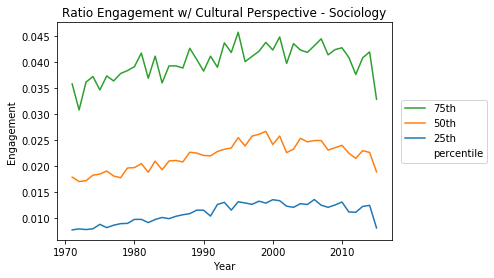

In [63]:
ax = sns.lineplot(x="publicationYear", y="culture_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Cultural Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_cultural_sociology_unfiltered"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

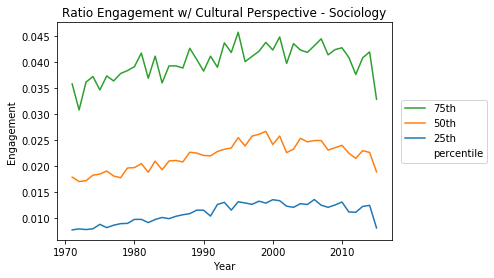

In [93]:
ax = sns.lineplot(x="publicationYear", y="culture_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Cultural Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_cultural_sociology_unfiltered"
# plt.savefig("../figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

In [77]:
import os

In [78]:
os.getcwd()

'/home/jovyan/work/nancyxu'

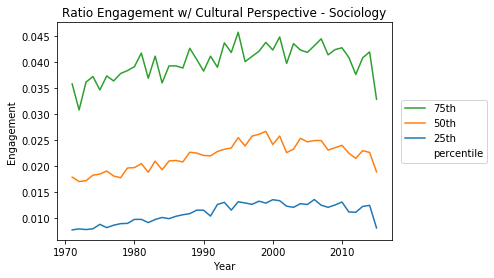

In [97]:
ax = sns.lineplot(x="publicationYear", y="culture_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Cultural Perspective - Sociology')

ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_cultural_sociology_unfiltered"
plt.savefig("/home/jovyan/work/nancyxu/figures/" + title + ".png", dpi=1200, figsize=(20, 16), bbox_inches="tight")
plt.show()

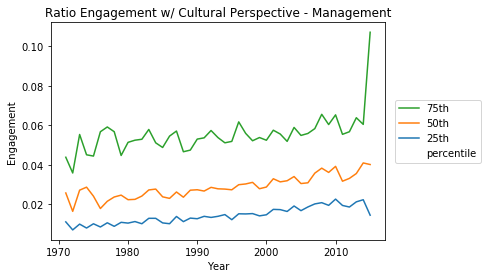

In [81]:
df_management = df_management[~df_management['publicationYear'].isin([1970,2016])]
ax = sns.lineplot(x="publicationYear", y="culture_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Cultural Perspective - Management')
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_cultural_mgmt_unfiltered"
plt.savefig("./figures/" + title + ".png",  dpi=1200, figsize=(20, 16), bbox_inches="tight")
plt.show()

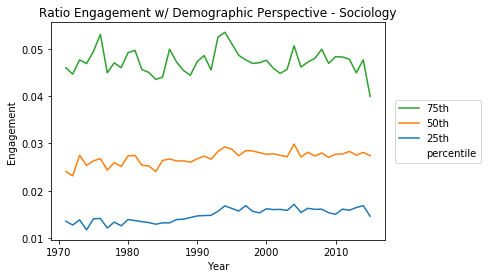

In [82]:
ax = sns.lineplot(x="publicationYear", y="demographic_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Demographic Perspective - Sociology')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_demographic_sociology_unfiltered"
plt.savefig("./figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

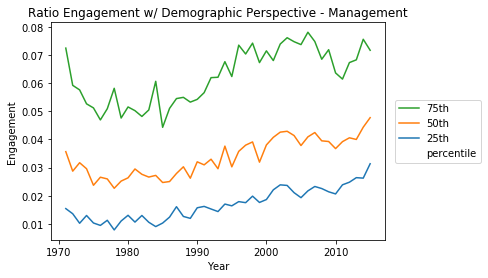

In [83]:
ax = sns.lineplot(x="publicationYear", y="demographic_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Demographic Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_demographic_mgmt_unfiltered"
plt.savefig("./figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

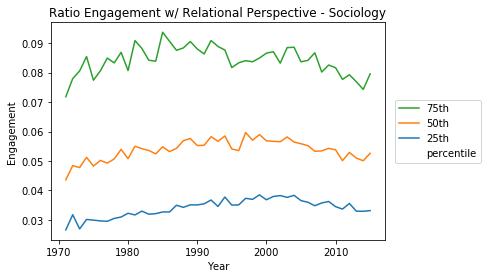

In [84]:
ax = sns.lineplot(x="publicationYear", y="relational_ratio", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Relational Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_relational_sociology_unfiltered"
plt.savefig("./figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

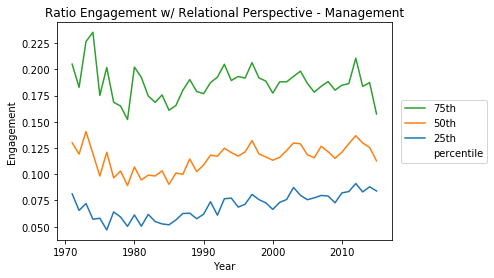

In [85]:
ax = sns.lineplot(x="publicationYear", y="relational_ratio", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Ratio Engagement w/ Relational Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "ratio_relational_mgmt_unfiltered"
plt.savefig("./figures/" + title + ".png", dpi=200, figsize=(8, 6), bbox_inches="tight")
plt.show()

## COSINE

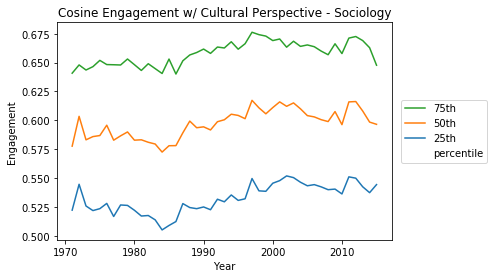

In [110]:
ax = sns.lineplot(x="publicationYear", y="culture_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Cultural Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_sociology_unfiltered"
plt.savefig("./figures/" + title + ".png",  dpi=2000, figsize=(16, 12), bbox_inches="tight")
plt.show()

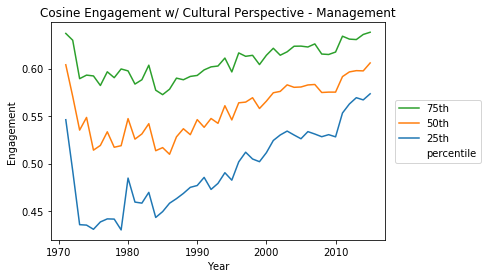

In [111]:
ax = sns.lineplot(x="publicationYear", y="culture_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Cultural Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_cultural_mgmt_unfiltered"
plt.savefig("./figures/" + title + ".png", dpi=2000, figsize=(16, 12), bbox_inches="tight")
plt.show()

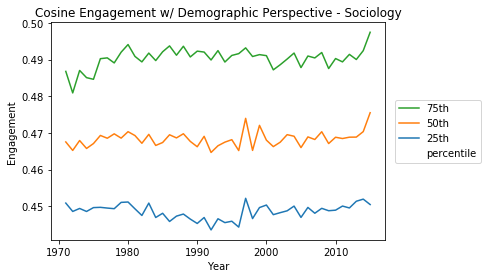

In [112]:
ax = sns.lineplot(x="publicationYear", y="demographic_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Demographic Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_sociology_unfiltered"
plt.savefig("./figures/" + title + ".png",  dpi=2000,figsize=(16, 12), bbox_inches="tight")
plt.show()

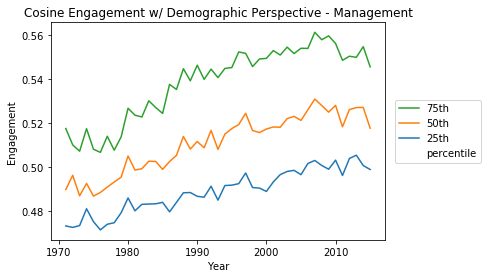

In [113]:
ax = sns.lineplot(x="publicationYear", y="demographic_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Demographic Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_demographic_mgmt_unfiltered"
plt.savefig("./figures/" + title + ".png",  dpi=2000, figsize=(16, 12), bbox_inches="tight")
plt.show()

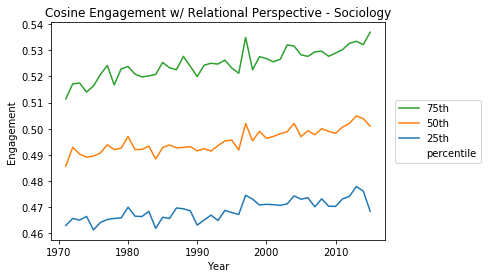

In [114]:
ax = sns.lineplot(x="publicationYear", y="relational_word2vec", data=df_sociology, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Relational Perspective - Sociology')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(8, 6)
title = "cosine_relational_sociology_unfiltered"
plt.savefig("./figures/" + title + ".png",  dpi=2000,figsize=(16, 12), bbox_inches="tight")
plt.show()

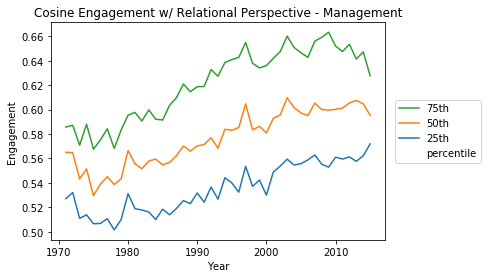

In [115]:
ax = sns.lineplot(x="publicationYear", y="relational_word2vec", data=df_management, hue = 'percentile')
ax.set(xlabel='Year', ylabel='Engagement')
# ax.set(ylim=(0.5, 0.7))
ax.set_title('Cosine Engagement w/ Relational Perspective - Management')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

fig.set_size_inches(20, 16)
title = "cosine_relational_mgmt_unfiltered"
plt.savefig("./figures/" + title + ".png",  dpi=2000, figsize=(16, 12), bbox_inches="tight")
plt.show()